# Определение перспективного тарифа для телеком компании

Описание проекта. 

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов.

Тариф «Смарт»

1. Ежемесячная плата: 550 рублей

2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей

2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение данных из файла

Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

Пре

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

Информация по df_calls.

In [3]:
display(df_calls.head())
print(df_calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


В df_calls есть следующие столбцы:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Информация по df_internet.

In [4]:
display(df_internet.head())
print(df_internet.info())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


В df_internet есть следующие столбцы:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Информация по df_messages.

In [5]:
display(df_messages.head())
print(df_messages.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


В df_messages есть следующие столбцы:
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Информация по df_tariffs.

In [6]:
display(df_tariffs.head())
print(df_tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


В df_tariffs есть следующие столбцы:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Информация по df_users.

In [7]:
display(df_users.head())
print(df_users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


В df_users есть следующие столбцы:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

### Вывод

* df_calls: встречаются нули в длительности звонка, столбец с датой звонка надо перевести в тип datetime.
* internet: столбец session_date надо перевести в datetime.
* df_messages: столбец message_date надо перевести в datetime.
* df_tariffs: в данных есть пропуски.
* df_users: в данных всё хорошо.

Для удобства работы лучше будет объеденить данные в одну таблицу.

## Предобработка данных

Напишем функцию to_datetime, которая будет переводить формат столбца к типу datetime.

In [8]:
def to_datetime(data, column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')

Переведём столбцы с датами во всех таблицах к типу datetime.

In [9]:
to_datetime(df_calls, 'call_date')
to_datetime(df_internet, 'session_date')
to_datetime(df_messages, 'message_date')
to_datetime(df_users, 'reg_date')
to_datetime(df_users, 'churn_date')

В df_calls в столбце duration встречаются нули, по примечанию из тз сказано, что тарификация поминутная, поэтому заменим все нули на единицы.

In [10]:
df_calls['duration'] = df_calls['duration'].replace(0, 1)

Округлим значения столбцов с минутами разговора и траффиком интернета до целого вверх.

In [11]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

Для работы нам понадобится информация по месяцам некоторых таблиц, напишем функцию month_number, которая создаст в таблицах столбец с месяцем.

In [13]:
def month_number(data, column):
    data['month'] = data[column].dt.month

In [14]:
month_number(df_calls, 'call_date')
month_number(df_messages, 'message_date')
month_number(df_internet, 'session_date')

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Объединим столбец df_tariffs и df_users.

In [15]:
df_users.set_axis(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff_name'], axis = 'columns', inplace = True)

table_user_tar = df_tariffs
table_user_tar = table_user_tar.merge(df_users, on = ['tariff_name'], how = 'left')

display(table_user_tar.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,first_name,last_name,reg_date
0,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,Иван,Ежов,2018-11-01
1,50,15360,500,550,200,3,3,smart,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17
2,50,15360,500,550,200,3,3,smart,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25
3,50,15360,500,550,200,3,3,smart,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26
4,50,15360,500,550,200,3,3,smart,1007,65,NaT,Москва,Юна,Березина,2018-04-19


Сохраним в переменных отдельно пользователей двух тарифных планов.

In [16]:
table_user_tar_smart = table_user_tar.query('tariff_name == "smart"')
table_user_tar_ultra = table_user_tar.query('tariff_name == "ultra"')

print('Количество пользователей тарифа Smart:', len(table_user_tar_smart))
print('Количество пользователей тарифа Ultra:', len(table_user_tar_ultra))

Количество пользователей тарифа Smart: 351
Количество пользователей тарифа Ultra: 149


Объеденим таблицу table_user_tar и df_calls.

In [17]:
user_call = table_user_tar.merge(df_calls, on = ['user_id'], how = 'left')
display(user_call.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,first_name,last_name,reg_date,id,call_date,duration,month
0,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,1001_0,2018-11-13,11.0,11.0
1,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,1001_1,2018-12-14,16.0,12.0
2,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,1001_2,2018-11-20,3.0,11.0
3,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,1001_3,2018-12-27,8.0,12.0
4,50,15360,500,550,200,3,3,smart,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,1001_4,2018-11-19,20.0,11.0


Сохраним сводную таблицу пользователей с количеством звонков и суммой минут помесячно.

In [18]:
user_call_sum = user_call.pivot_table(
    index = ['user_id', 'month'], 
    values='duration', 
    aggfunc=['count', 'sum'])

user_call_sum.sample(5)

,,count,sum
,,duration,duration
user_id,month,,
1475,5.0,33,298.0
1238,7.0,6,37.0
1392,7.0,68,462.0
1440,12.0,27,204.0
1224,8.0,66,521.0


In [19]:
calls_per_month = df_calls.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']})
calls_per_month.columns = ['calls', 'minutes']
calls_per_month.head()

calls  minutes
user_id month                
1000    5         22    164.0
        6         43    187.0
        7         47    346.0
        8         52    418.0
        9         58    478.0

Объединим таблицу user_call_sum и user_call.

In [20]:
table_user_call = user_call_sum
for df in [user_call]:
    table_user_call = table_user_call.merge(df, on = ['user_id', 'month'], how = 'left')
    
table_user_call.sample(5)

,user_id,month,"(count, duration)","(sum, duration)",messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,age,churn_date,city,first_name,last_name,reg_date,id,call_date,duration
177411,1438,11.0,44,317.0,50,15360,500,550,200,3,3,smart,24,2018-12-24,Екатеринбург,Нателла,Бородина,2018-10-05,1438_117,2018-11-30,15.0
94055,1239,6.0,37,315.0,50,15360,500,550,200,3,3,smart,68,NaT,Самара,Даниил,Ёрохов,2018-06-12,1239_252,2018-06-26,21.0
166312,1409,12.0,102,693.0,50,15360,500,550,200,3,3,smart,42,NaT,Набережные Челны,Даниил,Алиев,2018-03-14,1409_449,2018-12-02,5.0
183032,1455,5.0,77,605.0,1000,30720,3000,1950,150,1,1,ultra,38,NaT,Балашиха,Рубен,Авринский,2018-03-22,1455_453,2018-05-22,13.0
20475,1054,12.0,91,616.0,50,15360,500,550,200,3,3,smart,33,NaT,Омск,Кристина,Платонова,2018-03-20,1054_570,2018-12-02,11.0


Сохраним сводную таблицу pivot_call с данными о тарифах и статистике звонков.

In [21]:
pivot_call = table_user_call.pivot_table(
    index = ['user_id', 'age', 'city', 'month', 'tariff_name', 'rub_monthly_fee', 'minutes_included', 'messages_included', 'rub_per_message', 'rub_per_gb', 'rub_per_minute', 'mb_per_month_included'], 
    values = ['duration'], 
    aggfunc = ['count', 'sum'])
pivot_call.sample(5)

,,,,,,,,,,,,count,sum
,,,,,,,,,,,,duration,duration
user_id,age,city,month,tariff_name,rub_monthly_fee,minutes_included,messages_included,rub_per_message,rub_per_gb,rub_per_minute,mb_per_month_included,,
1308,52,Москва,4.0,smart,550,500,50,3,200,3,15360,28,207.0
1471,35,Вологда,10.0,ultra,1950,3000,1000,1,150,1,30720,75,569.0
1430,22,Тверь,5.0,ultra,1950,3000,1000,1,150,1,30720,42,292.0
1482,68,Санкт-Петербург,10.0,smart,550,500,50,3,200,3,15360,41,311.0
1452,74,Москва,8.0,ultra,1950,3000,1000,1,150,1,30720,22,157.0


### Количество отправленных сообщений по месяцам

Объеденим таблицу table_user_tar и df_messages.

In [22]:
user_messages = table_user_tar.merge(
    df_messages, 
    on = ['user_id'], 
    how = 'left')

user_messages = user_messages.pivot_table(
    index = ['user_id', 'month'], 
    values='id', 
    aggfunc=['count'])

user_messages.sample(10)

,,count
,,id
user_id,month,
1448,12.0,40
1427,5.0,12
1491,12.0,51
1096,12.0,67
1496,5.0,40
1431,5.0,98
1039,6.0,62
1106,7.0,24


Соединим таблицы pivot_call и user_messages, сохраним в одной таблице merge.

In [23]:
merge = pivot_call.join(user_messages, how='outer' )
merge.sample(5)

,,,,,,,,,,,,count,sum,count
,,,,,,,,,,,,duration,duration,id
user_id,month,rub_per_gb,minutes_included,rub_monthly_fee,messages_included,rub_per_minute,age,tariff_name,city,mb_per_month_included,rub_per_message,,,
1201,9.0,150,3000,1950,1000,1,32,ultra,Москва,30720,1,133.0,1071.0,NaN
1006,6.0,200,500,550,50,3,21,smart,Ульяновск,15360,3,53.0,483.0,NaN
1097,11.0,150,3000,1950,1000,1,29,ultra,Краснодар,30720,1,92.0,785.0,28.0
1466,3.0,150,3000,1950,1000,1,37,ultra,Новосибирск,30720,1,68.0,427.0,NaN
1483,10.0,200,500,550,50,3,28,smart,Ульяновск,15360,3,106.0,880.0,43.0


### Объем израсходованного интернет-трафика по месяцам

Объеденим таблицу table_user_tar и df_internet.

In [24]:
mb_used = table_user_tar.merge(df_internet, on = ['user_id'], how='left')
mb_used = mb_used.pivot_table(index = ['user_id', 'month'], values='mb_used', aggfunc=['sum'])
mb_used.sample(10)

,,sum
,,mb_used
user_id,month,
1135,11.0,23854.63
1078,9.0,22770.04
1024,12.0,35948.13
1081,3.0,5181.60
1356,10.0,32990.65
1214,7.0,12445.57
1423,9.0,18621.06
1244,5.0,11952.96


Соединим таблицы merge и mb_used_sum, сохраним в одной таблице full_table.

In [25]:
full_table = merge.join(mb_used, how='outer')
full_table.columns = ['duration_count', 'duration_count_sum', 'messages', 'mb_used']
full_table.reset_index(inplace=True)
full_table.sample(10)

,user_id,month,rub_per_gb,minutes_included,rub_monthly_fee,messages_included,rub_per_minute,age,tariff_name,city,mb_per_month_included,rub_per_message,duration_count,duration_count_sum,messages,mb_used
1777,1281,10.0,150.0,3000.0,1950.0,1000.0,1.0,62.0,ultra,Нижний Новгород,30720.0,1.0,62.0,450.0,79.0,18444.11
2671,1416,10.0,150.0,3000.0,1950.0,1000.0,1.0,50.0,ultra,Санкт-Петербург,30720.0,1.0,152.0,1109.0,101.0,18716.22
748,1118,4.0,200.0,500.0,550.0,50.0,3.0,65.0,smart,Казань,15360.0,3.0,93.0,763.0,NaN,14198.87
185,1028,12.0,150.0,3000.0,1950.0,1000.0,1.0,20.0,ultra,Тверь,30720.0,1.0,143.0,1214.0,171.0,15790.18
2680,1418,10.0,200.0,500.0,550.0,50.0,3.0,30.0,smart,Новосибирск,15360.0,3.0,22.0,165.0,13.0,3082.64
10,1002,6.0,200.0,500.0,550.0,50.0,3.0,59.0,smart,Стерлитамак,15360.0,3.0,15.0,118.0,4.0,10856.82
2892,1453,1.0,150.0,3000.0,1950.0,1000.0,1.0,50.0,ultra,Москва,30720.0,1.0,128.0,891.0,50.0,19450.33
2833,1439,7.0,200.0,500.0,550.0,50.0,3.0,62.0,smart,Орёл,15360.0,3.0,55.0,341.0,5.0,20039.64
1541,1243,8.0,150.0,3000.0,1950.0,1000.0,1.0,74.0,ultra,Пермь,30720.0,1.0,51.0,405.0,82.0,23806.65
1384,1217,9.0,200.0,500.0,550.0,50.0,3.0,42.0,smart,Ульяновск,15360.0,3.0,72.0,438.0,68.0,16006.47


Посмотрим на пропущенные значения в данных.

In [26]:
full_table.isna().sum()

user_id                    0
month                      0
rub_per_gb                40
minutes_included          40
rub_monthly_fee           40
messages_included         40
rub_per_minute            40
age                       40
tariff_name               40
city                      40
mb_per_month_included     40
rub_per_message           40
duration_count            40
duration_count_sum        40
messages                 497
mb_used                   11
dtype: int64

Есть пропуски в некоторых столбцах, возможно некоторые пользователи не отправляли сообщения или не пользовались интернетом в некоторые промежутки времени. Так же некоторые пропуски возникли после объединения таблиц.

Заменим пропуски на 0.

In [27]:
full_table = full_table.fillna(0)

### Помесячная выручка с каждого пользователя

Пересчитаем по формуле ((бесплатный лимит - потраченный) * цену единицы) и добавим столбцы с прибылью сверх тарифа по звонкам, сообщениям и интернету.

Для более точных расчётов округлим кол-во использованных мегабайтов в гигабайты в большую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [28]:
full_table['gb_used'] = np.ceil(full_table['mb_used'] / 1024)
full_table['gb_per_month_included'] = np.ceil(full_table['mb_per_month_included'] / 1024)

In [29]:
full_table['calls_revenue'] = ((full_table['duration_count_sum'] - full_table['minutes_included']) * full_table['rub_per_minute'])
full_table['messages_revenue'] = ((full_table['messages'] - full_table['messages_included']) * full_table['rub_per_message'])
full_table['gb_revenue'] = ((full_table['gb_used'] - full_table['gb_per_month_included']) * full_table['rub_per_gb'])
full_table.sample(5)

,user_id,month,rub_per_gb,minutes_included,rub_monthly_fee,messages_included,rub_per_minute,age,tariff_name,city,mb_per_month_included,rub_per_message,duration_count,duration_count_sum,messages,mb_used,gb_used,gb_per_month_included,calls_revenue,messages_revenue,gb_revenue
1580,1249,10.0,200.0,500.0,550.0,50.0,3.0,25.0,smart,Курск,15360.0,3.0,37.0,241.0,32.0,18443.46,19.0,15.0,-777.0,-54.0,800.0
422,1066,7.0,200.0,500.0,550.0,50.0,3.0,47.0,smart,Астрахань,15360.0,3.0,88.0,731.0,48.0,21408.35,21.0,15.0,693.0,-6.0,1200.0
1304,1203,12.0,150.0,3000.0,1950.0,1000.0,1.0,39.0,ultra,Москва,30720.0,1.0,80.0,717.0,39.0,11353.42,12.0,30.0,-2283.0,-961.0,-2700.0
1145,1178,11.0,200.0,500.0,550.0,50.0,3.0,56.0,smart,Москва,15360.0,3.0,50.0,338.0,13.0,13719.02,14.0,15.0,-486.0,-111.0,-200.0
1812,1285,8.0,200.0,500.0,550.0,50.0,3.0,44.0,smart,Краснодар,15360.0,3.0,51.0,447.0,112.0,5661.19,6.0,15.0,-159.0,186.0,-1800.0


Для верного подсчёта прибыли сверх тарифа, заменим отрицательные значения на 0. И заменим образовавшиеся пропуски на 0.

In [30]:
full_table['messages_revenue'] = full_table['messages_revenue'].clip(lower = 0)
full_table['calls_revenue'] = full_table['calls_revenue'].clip(lower = 0)
full_table['gb_revenue'] = full_table['gb_revenue'].clip(lower = 0)

Переведём нужные столбцы в тип int.

In [31]:
full_table['calls_revenue'] = full_table['calls_revenue'].astype('int')
full_table['messages_revenue'] = full_table['messages_revenue'].astype('int')
full_table['messages'] = full_table['messages'].astype('int')
full_table['gb_revenue'] = full_table['gb_revenue'].astype('int')
full_table['month'] = full_table['month'].astype('int')

Добавим новый столбец revenue, где подсуммируем прибыль с учетом стоимости тарифа и сверх тарифа.

In [32]:
full_table['revenue'] = full_table['rub_monthly_fee'] + full_table['calls_revenue'] + full_table['messages_revenue'] + full_table['gb_revenue']
full_table.sample(5)

,user_id,month,rub_per_gb,minutes_included,rub_monthly_fee,messages_included,rub_per_minute,age,tariff_name,city,mb_per_month_included,rub_per_message,duration_count,duration_count_sum,messages,mb_used,gb_used,gb_per_month_included,calls_revenue,messages_revenue,gb_revenue,revenue
74,1010,9,200.0,500.0,550.0,50.0,3.0,26.0,smart,Тюмень,15360.0,3.0,29.0,153.0,0,16151.87,16.0,15.0,0,0,200,750.0
1083,1171,11,200.0,500.0,550.0,50.0,3.0,47.0,smart,Москва,15360.0,3.0,93.0,729.0,78,16290.86,16.0,15.0,687,84,200,1521.0
670,1105,12,200.0,500.0,550.0,50.0,3.0,51.0,smart,Улан-Удэ,15360.0,3.0,47.0,283.0,82,25562.09,25.0,15.0,0,96,2000,2646.0
1093,1173,6,200.0,500.0,550.0,50.0,3.0,46.0,smart,Красноярск,15360.0,3.0,42.0,316.0,3,11687.01,12.0,15.0,0,0,0,550.0
113,1015,9,200.0,500.0,550.0,50.0,3.0,26.0,smart,Челябинск,15360.0,3.0,64.0,499.0,68,16776.74,17.0,15.0,0,54,400,1004.0


Сохраним в переменной total_revenue общую прибыль с каждого тарифа отдельно по звонкам/сообщениям/интернету и общую стоимость.

In [33]:
total_revenue = full_table.pivot_table(
    index = ['tariff_name'], 
    values = ['calls_revenue', 'messages_revenue', 'gb_revenue', 'revenue'],  
    aggfunc=['sum'])

total_revenue

sum                                       
            calls_revenue gb_revenue messages_revenue    revenue
tariff_name                                                     
0                       0          0                0        0.0
smart              316056    1330000            38784  2907490.0
ultra                   0     115050                0  1969500.0

* Больше всего приносит дополнительного дохода тариф Smart.
* Самым прибильным сегментом является - интернет, при том в двух тарифах.
* Общая прибыль больше всего у тарифа Smart.

## Анализ данных

Создадим 2 таблицы с даннами по тарифу smart и ultra

In [34]:
sum_smart = full_table[(full_table['tariff_name'] == 'smart')]
sum_ultra = full_table[(full_table['tariff_name'] == 'ultra')]

Построим гистограмму с кол-ством минут для тарифа Smart.

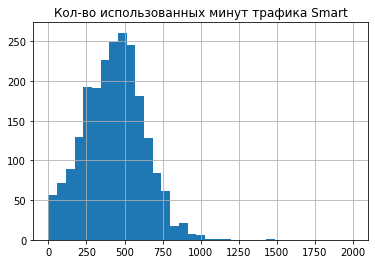

In [35]:
sum_smart['duration_count_sum'].hist(bins=35, range = (0, 2000))
plt.title('Кол-во использованных минут трафика Smart')
plt.show()

Пик затрат минут как раз приходится на лимит тарифа: 250 - 500 минут, но довольно много пользователей тратят больше лимита, доходя до 600 - 750 минут, встречаются и около 1000.

Построим гистограмму с кол-ством сообщений для тарифа.

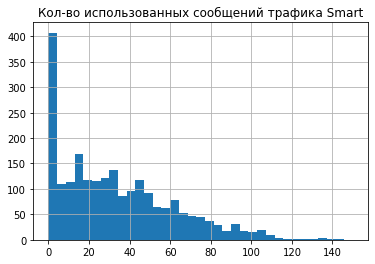

In [36]:
sum_smart['messages'].hist(bins=35, range = (0, 150))
plt.title('Кол-во использованных сообщений трафика Smart')
plt.show()

Много пользователей не отправляют сообщения, либо отправляют не более 5.
Несмотря на лимит в 50 сообщений, не мало пользователей превышают его и довольно много встречаются отправки 50-80 сообщений, есть выше 100 сообщений.

Построим гистограмму с кол-ством мегабайт для тарифа Smart.

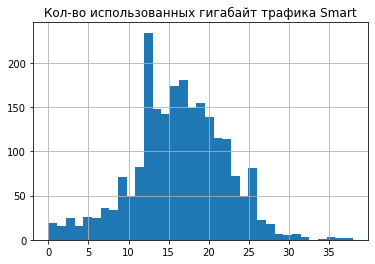

In [37]:
sum_smart['gb_used'].hist(bins=35)
plt.title('Кол-во использованных гигабайт трафика Smart')
plt.show()

Небольшая часть пользователей не пользуются интернетом, либо же используют не больше 10 гб.
Пик находится на уровне 12-20 гб, но много пользователей превышают данный лимит и хвост доходит к 0 только ближе к 30 гб.

Построим гистограмму с кол-ством минут для тарифа Ultra.

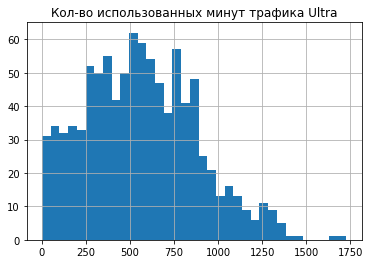

In [38]:
sum_ultra['duration_count_sum'].hist(bins=35)
plt.title('Кол-во использованных минут трафика Ultra')
plt.show()

Некоторая часть пользователей не пользуются сотовой связью, либо же используют не больше 250 минут.
Пик кол-ства минут находится около 500-600 минут и держится до 800 минут, далее резкий спад, хвост приближается к 0 после 1300 минут.

Построим гистограмму с кол-ством сообщений для тарифа.

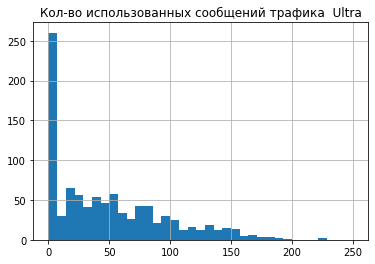

In [39]:
sum_ultra['messages'].hist(bins=35, range = (0, 250))
plt.title('Кол-во использованных сообщений трафика  Ultra')
plt.show()

Довольно таки много пользователей не отпрааляют сообщения, либо же отправляют не больше 5.
Те, кто пользуется отправкой сообщений отправляет около 20-100 сообщений, хвост приближается к 0 после 150 сообщений.

Построим гистограмму с кол-ством гигабайт для тарифа Ultra.

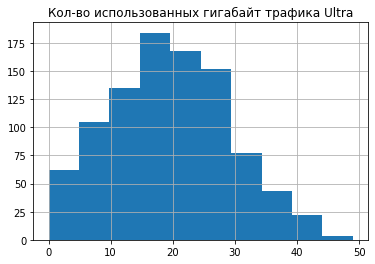

In [40]:
sum_ultra['gb_used'].hist(bins=10)
plt.title('Кол-во использованных гигабайт трафика Ultra')
plt.show()

Небольшая часть пользователей не использует интернет.
Пик мегабайт находится на 15-30 гб, хвост приближается к 0 после 40 гб.

Посчитаем среднее количество, дисперсию и стандартное отклонение по каждому тарифу.

In [41]:
variance = full_table.pivot_table(
    index = ['tariff_name'], 
    values = ['duration_count_sum', 'messages', 'gb_used'], 
    aggfunc=['mean', 'var', 'std'])

variance.round(0)

mean                                 var          \
            duration_count_sum gb_used messages duration_count_sum gb_used   
tariff_name                                                                  
0                          0.0    19.0     54.0                0.0    70.0   
smart                    431.0    16.0     33.0            37578.0    33.0   
ultra                    560.0    19.0     49.0            99063.0    98.0   

                                    std                   
            messages duration_count_sum gb_used messages  
tariff_name                                               
0             4157.0                0.0     8.0     64.0  
smart          799.0              194.0     6.0     28.0  
ultra         2199.0              315.0    10.0     47.0

### Вывод по анализу данных

* Пользователи тарифа Smart часто выходят за лимиты тарифа, чаще всего по кол-ству минут и по лимиту мегабайт.
* Пользователи тарифа Ultra практически не превышают лимитов, кроме мегабайт интернета.
* Пользователи двух тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.
* В двух тарифах пользователи не пользуются отправкой сообщений, либо же используют в небольших кол-ствах до 5-10 сообщений.
* Пользователи тарифа Ultra чаще всего не используют весь лимит по звонкам и сообщениям.

## Проверка гипотез

Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

H₀: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются.

H₁: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [42]:
smart = sum_smart['revenue']
ultra = sum_ultra['revenue']

print('cреднее значение Smart: ',pd.Series(smart).mean())
print('cреднее значение Ultra: ',pd.Series(ultra).mean())
alpha = 0.05

results = st.ttest_ind(smart, ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее значение Smart:  1307.9127305443094
cреднее значение Ultra:  2070.9779179810726
p-значение: 9.508492042148251e-147
Отвергаем нулевую гипотезу


Выручка по двум тарифам различается. Средняя выручка из тарифа Ultra выше.

Гипотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

H₀: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

H₁: Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сохраним в moscow_tariff список пользователей из Москвы, а в other_tariff список пользователей из других регионов.

In [43]:
moscow_tariff = full_table[(full_table['city'] == 'Москва')]
other_tariff = full_table[(full_table['city'] != 'Москва')]

Проверим, отличается ли среднняя выручка по пользователям Москвы и других регионов.

In [44]:
moscow = moscow_tariff['revenue']
other = other_tariff['revenue']

print('Выручка по Москве: ',pd.Series(moscow).mean())
print('Выручка с других регионов: ',pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(
    moscow, 
    other) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Выручка по Москве:  1555.8295081967212
Выручка с других регионов:  1508.4231950844853
p-значение: 0.19685279131193426
Не получилось отвергнуть нулевую гипотезу


Выручка по Москве и другим регионам различается. Если судить по средним значениям, то различие не сильное.

Проверим отличается ли выручка по Москве тарифа Smart от выручки по другим регионам.

Гипотеза: средняя выручка тарифа Smart пользователей из Москвы не отличается от выручки пользователей из других регионов.

Сохраним moscow_tariff_smart список пользователей из Москвы с тарифом Смарт, а в other_tariff список пользователей из других регионов.

In [45]:
moscow_tariff_smart = full_table[(full_table['city'] == 'Москва') & (full_table['tariff_name'] == 'smart')]
other_tariff_smart = full_table[(full_table['city'] != 'Москва') & (full_table['tariff_name'] == 'smart')]

In [46]:
moscow = moscow_tariff_smart['revenue']
other = other_tariff_smart['revenue']

print('cреднее до: ',pd.Series(moscow).mean())
print('cреднее после: ',pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(moscow, other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее до:  1254.8082901554403
cреднее после:  1319.0713119216114
p-значение: 0.16588580294265398
Не получилось отвергнуть нулевую гипотезу


Выручка по Москве и других регионам, по тарифу Смарт, почти не различается. 

Гипотеза: средняя выручка тарифа Ultra пользователей из Москвы не отличается от выручки пользователей из других регионов.

Сохраним moscow_tariff_smart список пользователей из Москвы с тарифом Ультра, а в other_tariff список пользователей из других регионов.

In [47]:
moscow_tariff_ultra = full_table[(full_table['city'] == 'Москва') & (full_table['tariff_name'] == 'ultra')]
other_tariff_ultra = full_table[(full_table['city'] != 'Москва') & (full_table['tariff_name'] == 'ultra')]

In [48]:
moscow = moscow_tariff_ultra['revenue']
other = other_tariff_ultra['revenue']

print('Выручка по Москве тарифа Ultra: ',pd.Series(moscow).mean())
print('Выручка с других регионов тарифа Ultra: ',pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(moscow, other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Выручка по Москве тарифа Ultra:  2074.5535714285716
Выручка с других регионов тарифа Ultra:  2069.876203576341
p-значение: 0.8719437051466759
Не получилось отвергнуть нулевую гипотезу


Выручка по Москве и других регионам, по тарифу Ультра, почти не различается.

## Общий вывод

После исследования можно сказать, что:
* Пользователи больше предпочитают тариф Smart.
* Больше всего приносит дополнительного дохода тариф Smart.
* Самым прибильным сегментом является - интернет.
* Общая прибыль больше всего у тарифа Smart.
* Пользователи тарифа Smart не укладываются в лимиты тарифа, чаще всего по кол-ству минут и по лимиту мегабайт.
* Пользователи тарифа Ultra практически не превышают лимитов, кроме мегабайт интернета.
* Пользователи двух тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.
* В двух тарифак довольно много пользователей которые не пользуются отправкой сообщений, либо же используют в небольших кол-ствах до 5-10 сообщений.
* Пользователи тарифа Ultra чаще всего не используют весь лимит по звонкам и сообщениям.
* Несмотря на то, что больше прибыли приносит тариф Smart, среднняя выручка выше у Ultra.
* Разница в средней выручке из Москвы и других регонов - незначительная.
* Разница в средней выручке двух тарифов из Москвы и других регонов - незначительная.